# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from pandas import DataFrame
### Data generation
X, y = make_moons(n_samples=10000, noise=0.27)

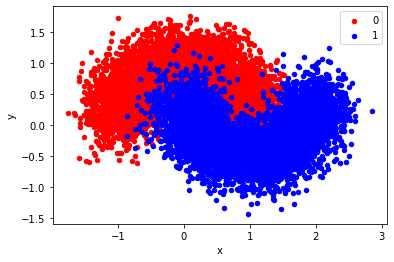

In [2]:
### This function allows to plot the two moons
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

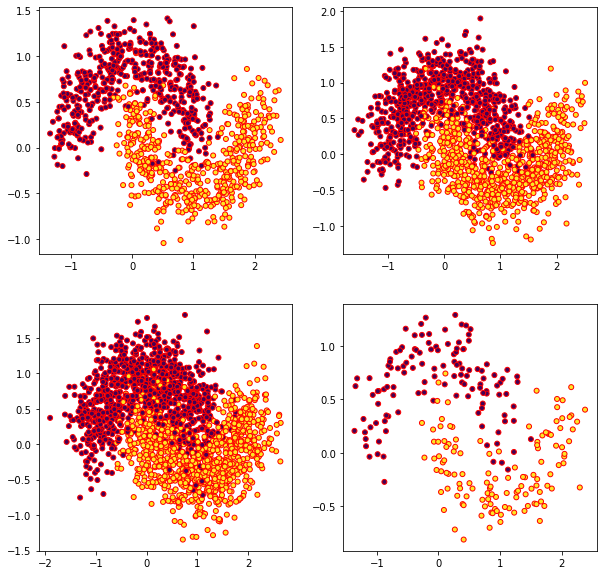

In [3]:
X1, y1 = make_moons(n_samples=1000, noise=0.2)
X2, y2 = make_moons(n_samples=1500, noise=0.27)
X3, y3 = make_moons(n_samples=2000, noise=0.3)
X4, y4 = make_moons(n_samples=250, noise=0.20)

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.scatter(X1[:,0],X1[:,1],label = y1, marker="o", c=y1, s=25, edgecolor="r")
plt.subplot(222)
plt.scatter(X2[:,0],X2[:,1],label = y2, marker="o", c=y2, s=25, edgecolor="r")
plt.subplot(223)
plt.scatter(X3[:,0],X3[:,1],label = y3, marker="o", c=y3, s=25, edgecolor="r")
plt.subplot(224)
plt.scatter(X4[:,0],X4[:,1],label = y4, marker="o", c=y4, s=25, edgecolor="r")


❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [5]:
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=250, noise=0.20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [6]:
from keras import layers, Model, optimizers, regularizers

input = layers.Input(shape=(2,))
inter = layers.Dense(5, activation='relu')(input)
output = layers.Dense(1, activation='sigmoid')(inter)

In [7]:
def initialize_model():
    model = Model(input, output)
    
    model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
    
    return model


model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [9]:
history = model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test),
                    batch_size = 87, epochs = 32)

Epoch 1/32
3/3 [==============================] - 0s 52ms/step - loss: 0.6290 - accuracy: 0.7600 - val_loss: 0.6178 - val_accuracy: 0.8000
Epoch 2/32
3/3 [==============================] - 0s 7ms/step - loss: 0.6251 - accuracy: 0.7714 - val_loss: 0.6148 - val_accuracy: 0.8000
Epoch 3/32
3/3 [==============================] - 0s 8ms/step - loss: 0.6214 - accuracy: 0.7943 - val_loss: 0.6119 - val_accuracy: 0.8000
Epoch 4/32
3/3 [==============================] - 0s 8ms/step - loss: 0.6177 - accuracy: 0.8057 - val_loss: 0.6091 - val_accuracy: 0.8000
Epoch 5/32
3/3 [==============================] - 0s 9ms/step - loss: 0.6143 - accuracy: 0.8057 - val_loss: 0.6067 - val_accuracy: 0.8400
Epoch 6/32
3/3 [==============================] - 0s 10ms/step - loss: 0.6109 - accuracy: 0.8114 - val_loss: 0.6047 - val_accuracy: 0.8400
Epoch 7/32
3/3 [==============================] - 0s 9ms/step - loss: 0.6079 - accuracy: 0.8171 - val_loss: 0.6026 - val_accuracy: 0.8400
Epoch 8/32
3/3 [================

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [10]:
history.__dict__

{'validation_data': None,
 'model': <keras.engine.functional.Functional at 0x229279a1e80>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6289782524108887,
   0.6250585317611694,
   0.6213681697845459,
   0.6177434921264648,
   0.6142661571502686,
   0.6109429001808167,
   0.6078761219978333,
   0.604777991771698,
   0.6015464067459106,
   0.5985892415046692,
   0.5956918597221375,
   0.5929905772209167,
   0.590623140335083,
   0.5883538722991943,
   0.5864653587341309,
   0.5844607353210449,
   0.5823399424552917,
   0.5800144076347351,
   0.5775995850563049,
   0.574988603591919,
   0.5724145770072937,
   0.5700328350067139,
   0.5680956840515137,
   0.56586754322052,
   0.5639253258705139,
   0.5622528195381165,
   0.5604378581047058,
   0.5585733652114868,
   0.5566176772117615,
   0.5545548796653748,
   0.552470862865448,
   0.5502386689186096],
  'accuracy': [0.7599999904632568,
   0.7714285850524902,
   0.7942857146263123,
   0.805714309215545

❓ Plot the history of the train loss using the following function

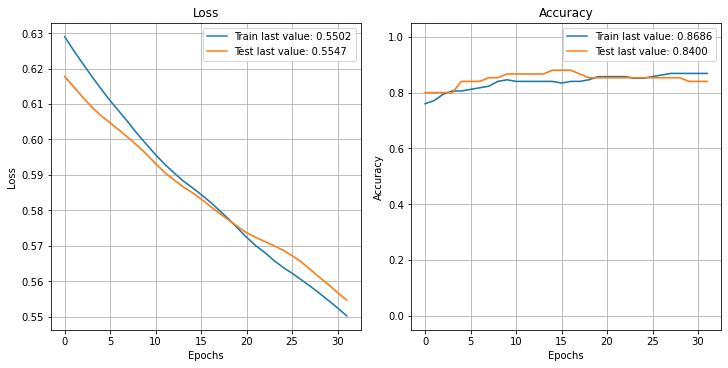

In [12]:
from plot_keras_history import plot_history

plot_history(history)
plt.show()

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [13]:
y_pred = model.predict(X_test)

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [21]:
model.evaluate(X_test, y_test, batch_size=32)


3/3 [==============================] - 0s 999us/step - loss: 0.5547 - accuracy: 0.8400


[0.5546709895133972, 0.8399999737739563]

- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [27]:
accuracy = model.evaluate(X_test, y_test, 'accuracy')
print(accuracy)

TypeError: unsupported operand type(s) for /: 'int' and 'str'

❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

❓ Did the test accuracy improve?

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


❓ What is the number of parameters of your new model?

Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

❓ Do you think we have overfitted on the noise? Check it out below